## 1D Nonlinear Convection

This is step two of '12 Steps to Navier Stokes'.

We solve the equation:

$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 $$

Which with some simple math is discretised to:

$$ u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n) $$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Grid and Initial Conditions

Essentially the same as what we did in step one for linear convection.

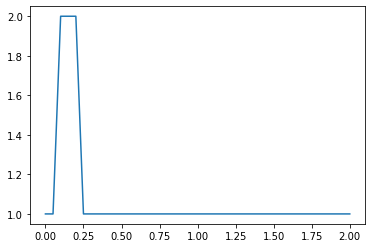

In [2]:
x_len = 10
num_x = 41
del_x = x_len / (num_x - 1)
num_t = 400
del_t = 0.025

u = np.ones(num_x)
u[int(0.5 / del_x) : int(1 / del_x + 1)] = 2

plt.plot(np.linspace(0, 2, num_x), u)

### Solve

Again, pretty much the same as step one.

(0.0, 2.0)

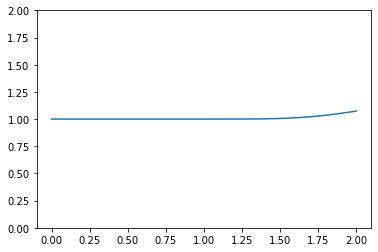

In [3]:
for n in range(0, num_t):
    u_n = u.copy()
    for i in range(1, num_x):
        u[i] = u_n[i] - u_n[i] * (del_t / del_x) * (u_n[i] - u_n[i-1])
        
plt.plot(np.linspace(0, 2, num_x), u)
plt.ylim(0, 2)

### Animate

The animation produced may not display if viewing on Github.

First, generate the figure for the animation:

Text(0.5, 1.0, '1D Linear Convection from t=0 to t=10')

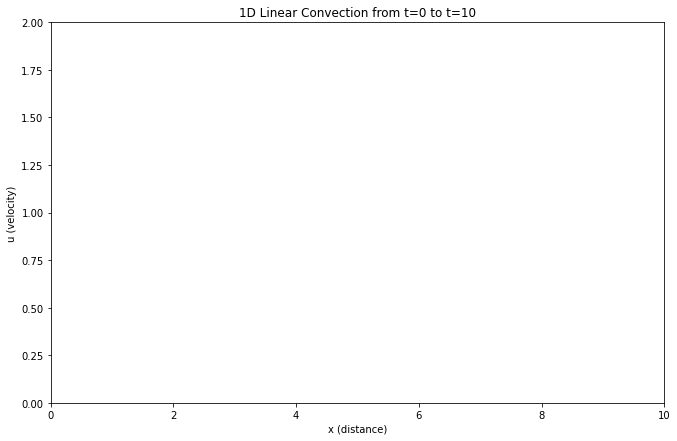

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML

#generate the figure
figure, axes = plt.subplots()
figure.set_size_inches(11, 7)
axes.set_xlim(0, x_len)
axes.set_ylim(0, 2)
line, = axes.plot([], [], lw=2)
plt.xlabel('x (distance)')
plt.ylabel('u (velocity)')
plt.title('1D Nonlinear Convection from t=0 to t=10')

Now, reset the initial conditions, re-solve, and this time, animate it:

In [5]:
#reset the initial condition
u = np.ones(num_x)
u[ int(0.5 / del_x) : int(1 / del_x - 1) ] = 2

#animation initialisation function
def initialise_anim():
    line.set_data([], [])
    return (line,)

#animation function which calculates u
#we can remove the outer time loop since this will be handled by the animation library
def animate(j):
    x = np.linspace(0, x_len, num_x)
    u_n = u.copy()
    for i in range(1, num_x):
        u[i] = u_n[i] - u_n[i] * (del_t/del_x) * (u_n[i] - u_n[i-1])
    line.set_data(x, u)
    return (line,)

#finally, run the animation
anim = animation.FuncAnimation(figure, animate, init_func=initialise_anim, frames=num_t, interval=20)
HTML(anim.to_jshtml())